0
1


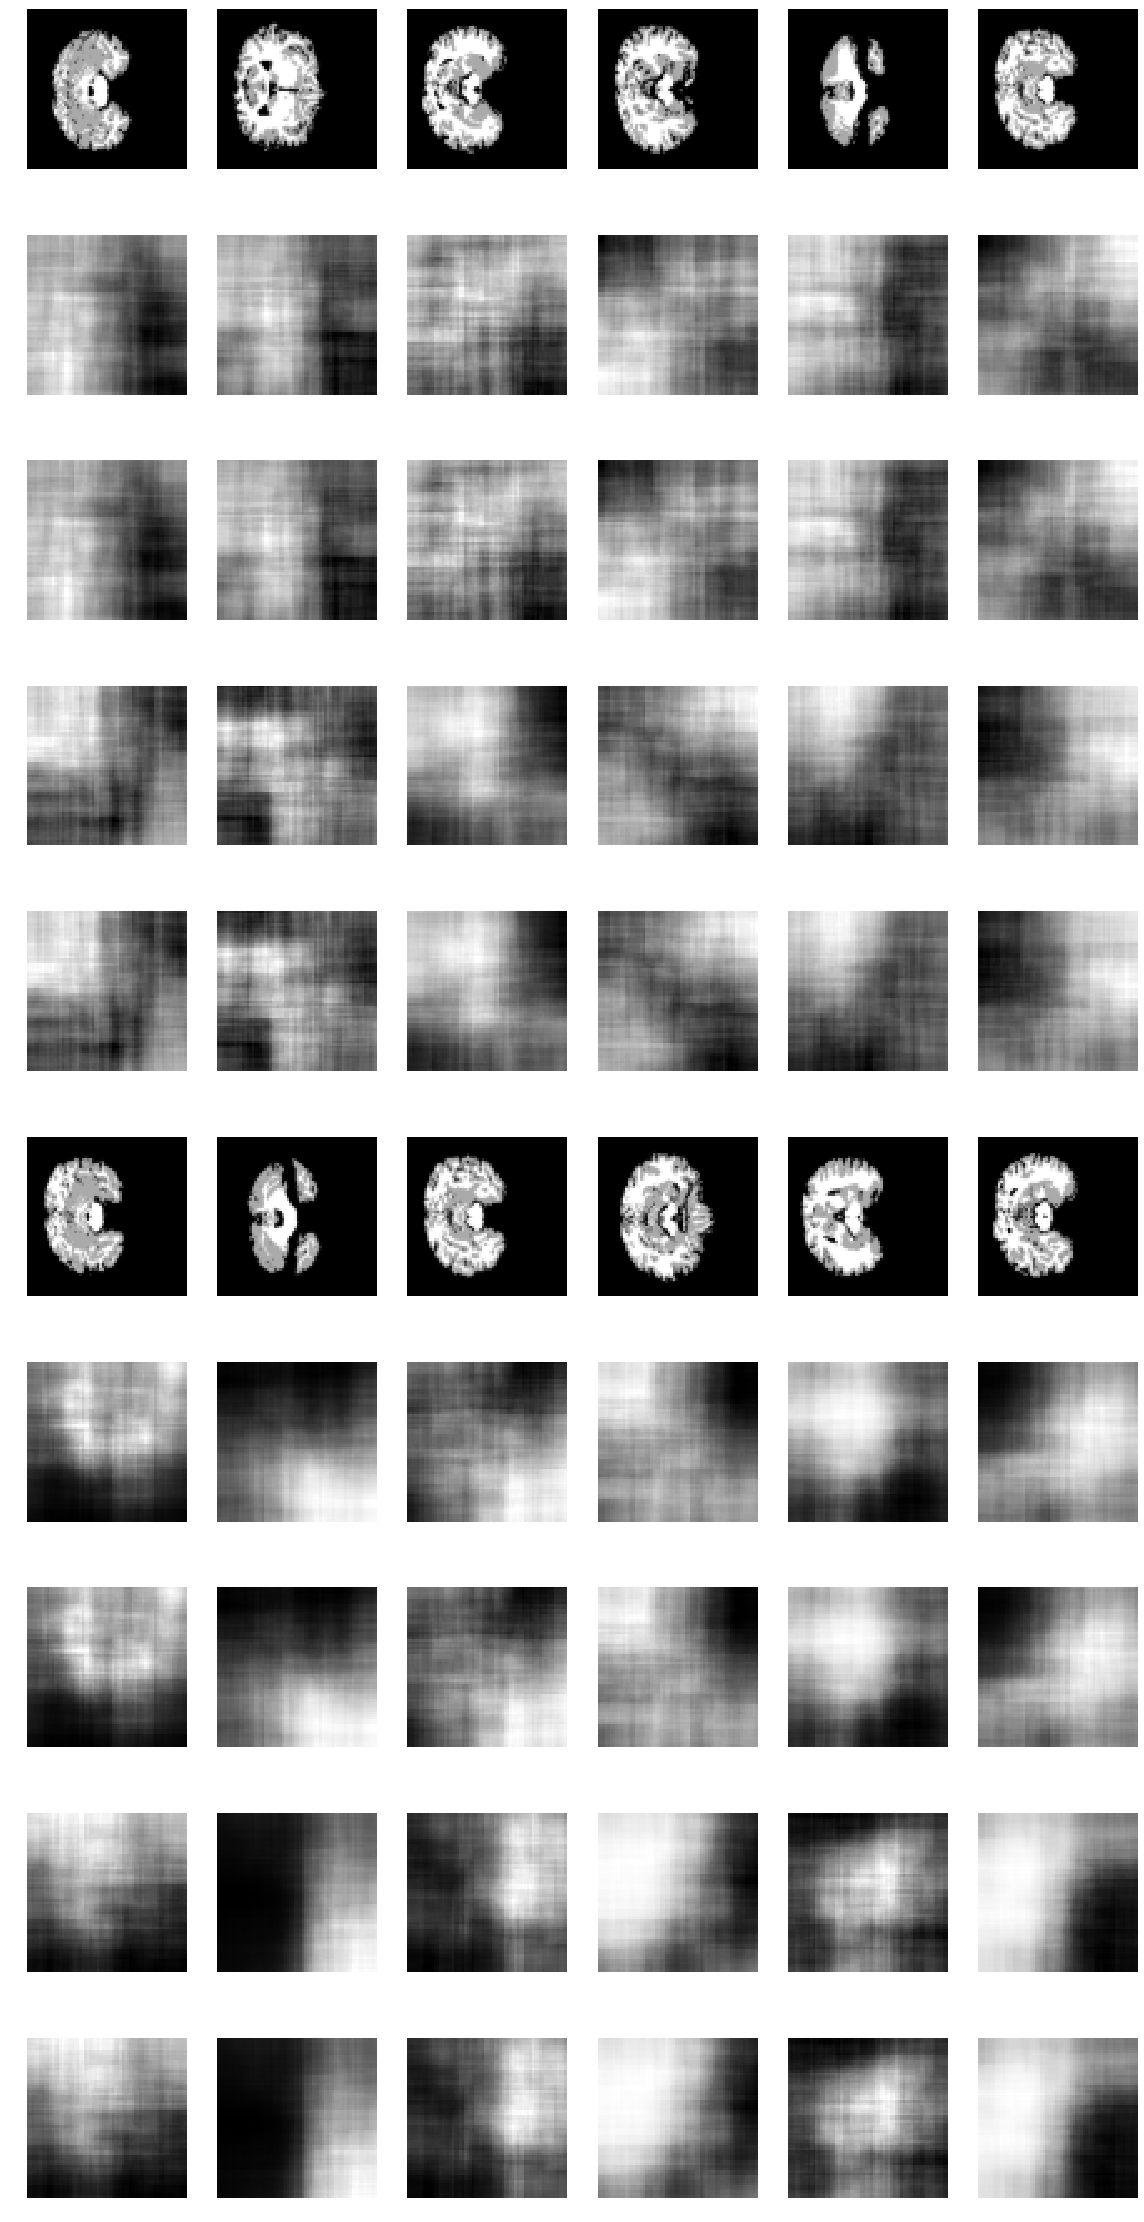

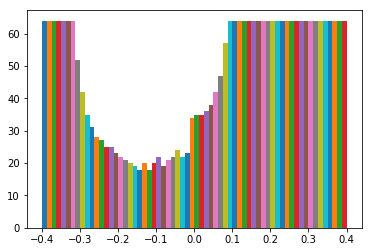

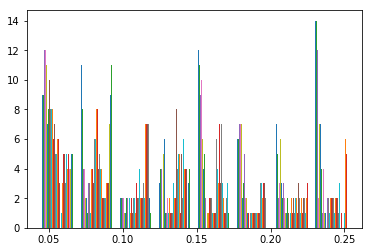

In [4]:
import scipy
from scipy import ndimage

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

PATH = '/scratch/users/nmiolane/output'

def sharpen(img, par=0.1, alpha=40):
    filter_img = ndimage.gaussian_filter(img, par)
    sharpened = img + alpha * (img - filter_img)
    return sharpened

def median_filter(img, par=3):
    out = ndimage.median_filter(img, par)
    return out

n_epochs = 1
n_imgs = 6
by = n_epochs

n_tot = n_epochs / by + 1

fig = plt.figure(figsize=(8*n_tot, 16*n_tot))

sharp_fun = sharpen

for i in range(0, n_epochs+1, by):
    print(i)
    foo = np.load(f'{PATH}/training/imgs/epoch_{i}_data.npy')
    recon = np.load(f'{PATH}/training/imgs/epoch_{i}_recon.npy')
    recon_from_prior = np.load(f'{PATH}/training/imgs/epoch_{i}_from_prior.npy')

    for id in range(n_imgs):
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+id+1)
        plt.imshow(foo[id][0], cmap='gray')
        plt.axis('off')
        
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+n_imgs+id+1)
        plt.imshow(recon[id][0], cmap='gray')
        plt.axis('off')
        
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+2*n_imgs+id+1)
        plt.imshow(sharp_fun(recon[id][0]), cmap='gray')
        plt.axis('off')
        
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+3*n_imgs+id+1)
        plt.imshow(recon_from_prior[id][0], cmap='gray')
        plt.axis('off')
        
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+4*n_imgs+id+1)
        plt.imshow(sharp_fun(recon_from_prior[id][0]), cmap='gray')
        plt.axis('off')
        
        
        plt.tight_layout()

plt.figure()
plt.hist(foo[0][0], bins='auto')
plt.show()
plt.figure()
plt.hist(recon[0][0], bins='auto')
plt.show()